In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train=pd.read_csv('/kaggle/input/titanic/train.csv')
test=pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Age, Cabin, Embarked 에 NULL값이 있다 
다른 Column 값들은 Non-NULL 개수가 891

## 1. Sex

In [6]:
print (train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean())

      Sex  Survived
0  female  0.742038
1    male  0.188908


여자는 74% 생존
남자는 18% 생존

## 2. Pclass

In [7]:
print (train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


1등급 객실 69% 생존 2등급 47% 3등급 24% 생존

In [30]:
pd.crosstab([train.Sex,train.Survived],train.Pclass,margins=True).style.background_gradient(cmap='summer_r')

1등급 객실의 여성생존자가 가장 많고 3등급객실의 남성사망자가 제일 많다

## 3. Age

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


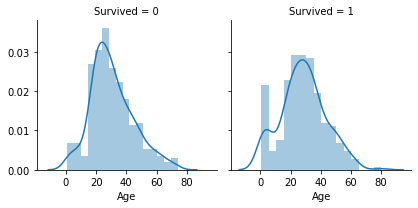

In [9]:
g = sns.FacetGrid(train, col='Survived')
g = g.map(sns.distplot, "Age")

## 4.Pclass,Sex,Age

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


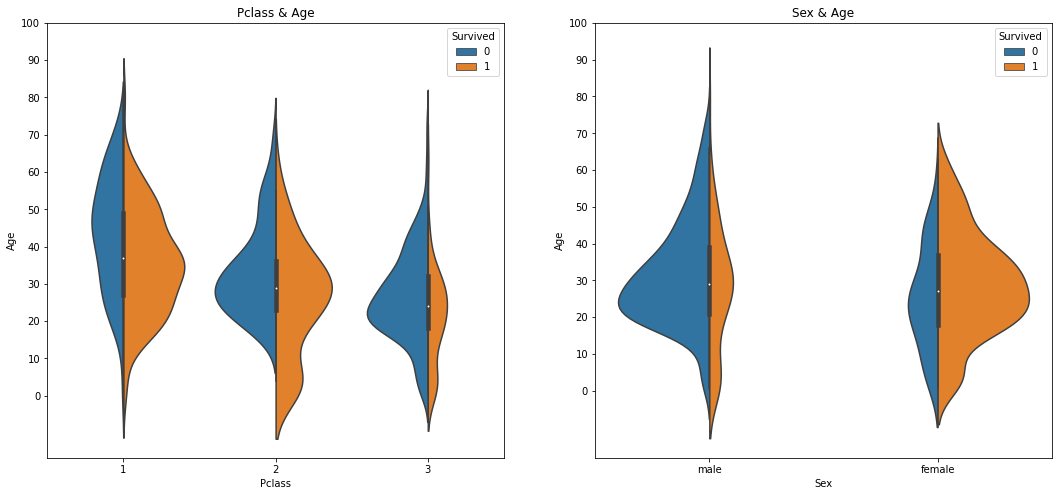

In [10]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass','Age',hue='Survived',data=train,scale='count',split=True,ax=ax[0])
ax[0].set_title('Pclass & Age')
ax[0].set_yticks(range(0,110,10))

sns.violinplot('Sex','Age',hue='Survived',data=train,scale='count',split=True,ax=ax[1])
ax[1].set_title('Sex & Age')
ax[1].set_yticks(range(0,110,10))

plt.show()


## 5.Feature Engineering

In [16]:
train['Age'].isnull().sum()

177

In [17]:
train['Age'].mean()

29.69911764705882

str.extract() 원하는 문자열 추출  Mr. Mrs. 등을 찾기 위해서!

In [25]:
train['first']=train['Name'].str.extract('([A-Za-z]+)\.')
test['first']=test['Name'].str.extract('([A-Za-z]+)\.')

In [26]:
train['Name'].str.extract('([A-Za-z]+)\.')

,0
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
...,...
886,Rev
887,Miss
888,Miss
889,Mr


In [34]:
pd.crosstab(train['first'],train['Sex']).T.style.background_gradient(cmap='summer_r')

first,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [40]:
train['first'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                      ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'],inplace=True)

<AxesSubplot:xlabel='first'>

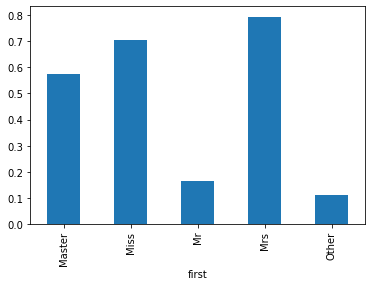

In [41]:
train.groupby('first')['Survived'].mean().plot.bar()

In [43]:
train.groupby('first').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
first,,,,,,,
Master,414.975000,0.575000,2.625000,7.116750,2.300000,1.375000,34.703125
Miss,411.741935,0.704301,2.284946,23.435484,0.698925,0.537634,43.937188
Mr,455.880907,0.162571,2.381853,32.118147,0.293006,0.151229,24.939822
Mrs,456.393701,0.795276,1.984252,35.181102,0.692913,0.818898,45.420603
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,19.102778


In [ ]:
train.loc[(train['Age'].isnull())&(train['first']=='Master'),'Age']=7
train.loc[(train['Age'].isnull())&(train['first']=='Miss'),'Age']=23
train.loc[(train['Age'].isnull())&(train['first']=='Mr'),'Age']=32
train.loc[(train['Age'].isnull())&(train['first']=='Mrs'),'Age']=35
train.loc[(train['Age'].isnull())&(train['first']=='Other'),'Age']=46

train.loc[(test['Age'].isnull())&(train['first']=='Master'),'Age']=7
train.loc[(test['Age'].isnull())&(train['first']=='Miss'),'Age']=23
train.loc[(test['Age'].isnull())&(train['first']=='Mr'),'Age']=32
train.loc[(test['Age'].isnull())&(train['first']=='Mrs'),'Age']=35
train.loc[(test['Age'].isnull())&(train['first']=='Other'),'Age']=46